In [45]:
import os

In [46]:
from skimage import data
import napari
import skimage.measure as meas
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pycromanager import Dataset

In [47]:
import napari
import numpy as np
from vispy.color import Colormap
import tifffile as tiff

In [48]:
folder_path = 'bact_gut_mask/im_set2'
file_list = os.listdir(folder_path)
file_list

['multi_ds_select_set1_id19_bfminmax_rlmax_d6_6_23_devA2_wn16_tp12_.tiff',
 'multi_ds_select_set1_id11_bfminmax_rlmax_d6_6_23_devA3_wn14_tp12_.tiff',
 'multi_ds_select_set1_id10_bfminmax_rlmax_d6_6_23_devA3_wn4_tp8_.tiff',
 'multi_ds_select_set1_id36_bfminmax_rlmax_d5_24_23_devC1_wn2_tp11_.tiff']

In [49]:
class mySet:
    def __init__(self,path,name,data):
        self.path = path
        self.name = name
        self.data = data
        self.current_w = None
        self.num_w = data.shape[0]
        self.q = np.arange(self.num_w).tolist()
        
    def get_next_w(self):
        self.current_w = self.q.pop()
#         print(self.current_w)
        return self.data[self.current_w]
    
    def save_annot(self,annot_stack):
        tiff.imsave(os.path.join(self.path,self.name+'_{}.tiff'.format(self.current_w)),annot_stack)

class mySet_files:
    def __init__(self,path,name,file_list):
        self.path = path
        self.name = name
        self.data = None
        self.current_f = None
        self.num_w = len(file_list) #data.shape[0]
        self.q = file_list#np.arange(self.num_w).tolist()
#         print(self.q.pop())
        self.current_data = None
        
    def get_next_w(self):
        self.current_f = self.q.pop()
#         print(self.current_f)
        self.current_data = tifffile.imread(os.path.join(self.path,self.current_f))
        return self.current_data
    
    def save_annot(self,annot_stack):
        save_stack = np.concatenate((self.current_data,annot_stack))
        tiff.imwrite(os.path.join(self.path,self.current_f[:-5]+'_{}.tiff'.format(self.name)),save_stack)
        print(self.name)
        
def open_worm(viewer,wstack):
    viewer.add_image(
        wstack,
        channel_axis=0,
        name=[f"Pos {0}, Channel Brightfield Max",f"Position {0}, Channel Brightfield Min", f"Position {0}, Channel green", f"Position {0}, Channel red"],
        colormap=["gray", "gray", 'green','red'],
    )
    
def save_open_next(viewer,myS):
    if myS.current_f is None:
        print('opening worm')
        open_worm(viewer,myS.get_next_w())
    else:
        try:
            names = [l.name for l in viewer.layers]
            worm_layer = viewer.layers[[i for i,j in enumerate(names) if j == 'bact_mask'][0]].data
            gut_layer = viewer.layers[[i for i,j in enumerate(names) if j == 'gut_mask'][0]].data
        
            stacked_images = np.dstack((worm_layer, gut_layer)).transpose(2, 0, 1)
            myS.save_annot(stacked_images)

            viewer.layers.clear()
        except IndexError:
            print('annotation layers not added yet')
            return
        
        try:
            open_worm(viewer,myS.get_next_w())
        except IndexError:
            print('finished anotating set')
            


previous_layer = None  # Variable to store the previous layer

def add_layer(viewer, color):
    global previous_layer

    # Deactivate the previous layer
    if previous_layer is not None:
        previous_layer.visible = False

    # Create a new labels layer
    labels = np.zeros((2048, 2048), dtype=np.uint16)
    anot_layer = viewer.add_labels(labels, name=color, seed=0.2)
    anot_layer.brush_size = 40
    anot_layer.mode = 'paint'

    # Update the previous layer variable
    previous_layer = anot_layer
        


In [50]:
path = os.path.join(os.getcwd(),'bact_gut_mask/im_set2')


myS = mySet_files(path,'bacteria_gut_mask',file_list)

viewer = napari.Viewer()

viewer.bind_key('g', lambda event: add_layer(viewer, 'gut_mask'))
viewer.bind_key('b', lambda event: add_layer(viewer, 'bact_mask'))
viewer.bind_key('c', lambda event: save_open_next(viewer,myS))

opening worm
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
finished anotating set


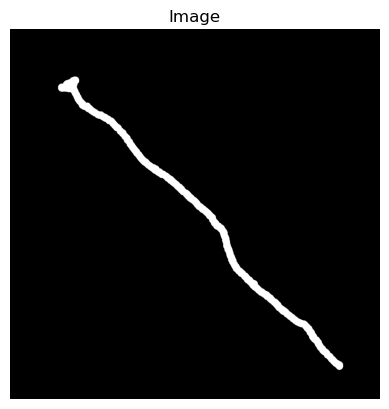

bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
bacteria_gut_mask
finished anotating set
annotation layers not added yet


In [44]:
img = 'bact_gut_mask/im_set/multi_ds_select_set1_id0_bfminmax_rlmax_d6_6_23_devA1_wn0_tp1__worm_gut_mask.tiff'
image = tiff.imread(img)

plt.imshow(image[5]*100, cmap='gray')  # You can adjust the colormap as needed
plt.title('Image')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()


In [12]:
img = 'gut_mask/edof_4set_for_annot/multi_ds_select_set1_id50_bfminmax_rlmax_d5_24_23_devC4_wn8_tp5_.tiff'
image = tiff.imread(img)

plt.imshow(image[0], cmap='gray')  # You can adjust the colormap as needed
plt.title('Image')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophiacofone/school_local/svi_worm_anno/annot/gut_mask/edof_4set_for_annot/multi_ds_select_set1_id50_bfminmax_rlmax_d5_24_23_devC4_wn8_tp5_.tiff'